<a href="https://colab.research.google.com/github/rohamvo/OTT-flatform-analysis/blob/main/Project_Topic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fake_useragent

In [ ]:
# import
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
# 세대 리스트
gen = ['baby-boomers', 'generation-x', 'generation-y', 'generation-z']

# 이용자 수 크롤링

In [ ]:
# 데이터 담을 리스트 준비
gen_baby = []
gen_x = []
gen_y = []
gen_z = []

for generation in gen:
  url = 'https://flixpatrol.com/demographics/{}/'.format(generation) # 장르별로 URL 접속 할 수 있게 포맷팅
  headers = {"user-agent": UserAgent().chrome}
  response = requests.get(url, headers=headers)
  page = response.content
  soup = BeautifulSoup(page, 'html.parser')
  for i in range(1, 461):
    rank_people = soup.select_one('tbody > tr:nth-of-type({}) > td:nth-of-type(3)'.format(i)).text
    # 세대별로 구분하기 위한 조건문
    if re.search(r'baby-boomers?', generation): # 가장 바깥 for문에 generation이 baby-bommers에 해당하면
      gen_baby.append(rank_people) # 안 쪽 for 문의 460개 데이터를 gen_baby에 추가
    elif re.search(r'^g.*x$', generation): # 가장 바깥 for문에 generation이 g로 시작하고 x로 끝나면
      gen_x.append(rank_people) # 안 쪽 for 문의 460개 데이터를 gen_x에 추가
    elif re.search(r'^g.*y$', generation): # 가장 바깥 for문에 generation이 g로 시작하고 y로 끝나면
      gen_y.append(rank_people) # 안 쪽 for 문의 460개 데이터를 gen_y에 추가
    elif re.search(r'^g.*z$', generation): # 가장 바깥 for문에 generation이 g로 시작하고 z로 끝나면
      gen_z.append(rank_people) # 안 쪽 for 문의 460개 데이터를 gen_z에 추가

In [ ]:
# 테스트
gen_baby[:3], gen_x[:3], gen_y[:3], gen_z[:3]

(['42,150,500', '12,518,300', '10,321,000'],
 ['76,189,100', '18,784,800', '14,927,600'],
 ['138,770,000', '37,266,000', '25,927,500'],
 ['78,199,300', '20,568,700', '17,723,400'])

# 제목 크롤링

In [ ]:
# 데이터 담을 리스트 준비
gen_baby_title = []
gen_x_title = []
gen_y_title = []
gen_z_title = []

for generation in gen:
  url = 'https://flixpatrol.com/demographics/{}/'.format(generation)
  headers = {"user-agent": UserAgent().chrome}
  response = requests.get(url, headers=headers)
  page = response.content
  soup = BeautifulSoup(page, 'html.parser')
  for i in range(1, 461):
    rank_title = rank_title = soup.select_one('tbody > tr:nth-of-type({}) > td:nth-of-type(2) div:nth-of-type(2) > div'.format(i)).text
    # 세대별로 구분하기 위한 조건문
    if re.search(r'baby-boomers?', generation):
      gen_baby_title.append(rank_title)
    elif re.search(r'^g.*x$', generation):
      gen_x_title.append(rank_title)
    elif re.search(r'^g.*y$', generation):
      gen_y_title.append(rank_title)
    elif re.search(r'^g.*z$', generation):
      gen_z_title.append(rank_title)

In [ ]:
# 테스트
gen_baby_title[:3], gen_x_title[:3], gen_y_title[:3], gen_z_title[:3]

(['Friends', 'Bones', 'Supernatural'],
 ['Friends', 'Supernatural', 'Bones'],
 ['Friends', 'Supernatural', 'Tom and Jerry'],
 ['Friends', 'Supernatural', 'Tom and Jerry'])

# 장르 크롤링

In [ ]:
# 데이터 담을 리스트 준비
gen_baby_genre = []
gen_x_genre = []
gen_y_genre = []
gen_z_genre = []


for generation in gen:
  url = 'https://flixpatrol.com/demographics/{}/'.format(generation)
  headers = {"user-agent": UserAgent().chrome}
  response = requests.get(url, headers=headers)
  page = response.content
  soup = BeautifulSoup(page, 'html.parser')
  for i in range(1, 461):
    # 장르 데이터가 있는 HTML 코드가 title마다 다름
    if re.search(r'[a-zA-Z]', soup.select('tbody > tr:nth-of-type({}) > td:nth-of-type(2) span'.format(i))[-3].text):
        # HTML 코드가 영어 대소문자를 포함할때 아래 위치 코드 추출
        rank_genre = soup.select('tbody > tr:nth-of-type({}) > td:nth-of-type(2) span'.format(i))[-3].text
    else: # 아닐경우 아래 위치 코드 추출
        rank_genre = soup.select('tbody > tr:nth-of-type({}) > td:nth-of-type(2) span'.format(i))[-1].text
    # 세대별로 구분하기 위한 조건문       
    if re.search(r'baby-boomers?', generation):
      gen_baby_genre.append(rank_genre)
    elif re.search(r'^g.*x$', generation):
      gen_x_genre.append(rank_genre)
    elif re.search(r'^g.*y$', generation):
      gen_y_genre.append(rank_genre)
    elif re.search(r'^g.*z$', generation):
      gen_z_genre.append(rank_genre)

In [ ]:
# 총 데이터 개수 테스트
len(gen_baby_genre), len(gen_x_genre), len(gen_y_genre), len(gen_z_genre)

(460, 460, 460, 460)

# 작품 type 크롤링

In [ ]:
# 데이터 담을 리스트 준비
gen_type = []

for generation in gen:
  url = 'https://flixpatrol.com/demographics/{}/'.format(generation)
  headers = {"user-agent": UserAgent().chrome}
  response = requests.get(url, headers=headers)
  page = response.content
  soup = BeautifulSoup(page, 'html.parser')
  for i in range(1, 461):
    if soup.select_one('tbody > tr:nth-of-type({}) > td:nth-of-type(2) div:nth-of-type(3) span'.format(i)).text == 'TV Show':
        gen_type.append('TV Show')
    elif soup.select_one('tbody > tr:nth-of-type({}) > td:nth-of-type(2) div:nth-of-type(3) span'.format(i)).text == 'Movie' or 'Franchise':
        gen_type.append('Movie')

In [ ]:
# 순서는 baby-boomers -> generation-x -> generation-y -> generation-z
gen_type[:10]

['TV Show',
 'TV Show',
 'TV Show',
 'Movie',
 'TV Show',
 'TV Show',
 'Movie',
 'TV Show',
 'TV Show',
 'TV Show']

In [ ]:
rank = [rank for rank in range(1, 461)] # 순위 컴프리헨션

In [ ]:
# 데이터 프레임 구축 준비
generation1 = ['baby-boomers' for gen in range(1, 461)]
generation2 = ['generation-x' for gen in range(1, 461)]
generation3 = ['generation-y' for gen in range(1, 461)]
generation4 = ['generation-z' for gen in range(1, 461)]

In [ ]:
import pandas as pd
# baby-bommers generation dataframe
df_gen_b = pd.DataFrame({
    'rank' : rank,
    'user_count' : gen_baby,
    'title' : gen_baby_title,
    'genre' : gen_baby_genre,
    'generation' : generation1
})

In [ ]:
# generation-x generation dataframe
df_gen_x = pd.DataFrame({
    'rank' : rank,
    'user_count' : gen_x,
    'title' : gen_x_title,
    'genre' : gen_x_genre,
    'generation' : generation2
})

In [ ]:
# generation-y generation dataframe
df_gen_y = pd.DataFrame({
    'rank' : rank,
    'user_count' : gen_y,
    'title' : gen_y_title,
    'genre' : gen_y_genre,
    'generation' : generation3
})

In [ ]:
# generation-z generation dataframe
df_gen_z = pd.DataFrame({
    'rank' : rank,
    'user_count' : gen_z,
    'title' : gen_z_title,
    'genre' : gen_z_genre,
    'generation' : generation4
})

In [ ]:
# genre_type에 넣을 순위
ranks = []
for i in range(4):
    ranks += rank

In [ ]:
generations = generation1+generation2+generation3+generation4

In [ ]:
# genre_type dataframe
df_gen_type = pd.DataFrame({
    'rank' : ranks,
    'genre type' : gen_type,
    'generation' : generations
})

In [ ]:
# 크롤링 데이터 csv 저장
df_gen_b.to_csv('baby-boomers.csv')
df_gen_x.to_csv('generation_x.csv')
df_gen_y.to_csv('generation_y.csv')
df_gen_z.to_csv('generation_z.csv')
df_gen_type.to_csv('genre_type')

In [ ]:
# csv 파일 불러오기
import pandas as pd
df_gen_b = pd.read_csv('baby-boomers.csv')
df_gen_x = pd.read_csv('generation_x.csv')
df_gen_y = pd.read_csv('generation_y.csv')
df_gen_z = pd.read_csv('generation_z.csv')
df_gen_type = pd.read_csv('genre_type', index_col = 0)

# 데이터 전처리

In [ ]:
# 모든 세대 데이터프레임 병합
df_all_gen = pd.concat([df_gen_b, df_gen_x, df_gen_y, df_gen_z])

In [ ]:
df_all_gen

,rank,user_count,title,genre,generation
0,1,"42,150,500",Friends,Comedy,baby-boomers
1,2,"12,518,300",Bones,Crime,baby-boomers
2,3,"10,321,000",Supernatural,Fantasy,baby-boomers
3,4,"8,263,000",Se7en,Crime,baby-boomers
4,5,"6,937,700",Vikings,History,baby-boomers
...,...,...,...,...,...
455,456,"8,000",Best Exotic Marigold Hotel,Comedy,generation-z
456,457,"7,000",All the King's Men,Drama,generation-z
457,458,"6,000",The Constant Gardener,Thriller,generation-z
458,459,"4,600",Star Trek: Alternate Reality,Science Fiction,generation-z


In [ ]:
# 필요없는 열 제거(jupyter notebook 환경에서는 데이터프레임 병합 시 'Unnamed:0'이라는 열이 생겼으나 colab에서는 생기지 않음'
del df_all_gen['Unnamed: 0']

In [ ]:
# 인덱스 초기화
df_all_gen = df_all_gen.reset_index(drop = True)

In [ ]:
df_all_gen

,rank,user_count,title,genre,generation
0,1,"42,150,500",Friends,Comedy,baby-boomers
1,2,"12,518,300",Bones,Crime,baby-boomers
2,3,"10,321,000",Supernatural,Fantasy,baby-boomers
3,4,"8,263,000",Se7en,Crime,baby-boomers
4,5,"6,937,700",Vikings,History,baby-boomers
...,...,...,...,...,...
1835,456,"8,000",Best Exotic Marigold Hotel,Comedy,generation-z
1836,457,"7,000",All the King's Men,Drama,generation-z
1837,458,"6,000",The Constant Gardener,Thriller,generation-z
1838,459,"4,600",Star Trek: Alternate Reality,Science Fiction,generation-z


# 토픽3에서 사용할 영화 찾기

In [ ]:
# 3개의 사이트에 공통적으로 게시되어 있는 작품을 찾기 위해 여분의 랭크까지 추출
avr_rank_460 = df_all_gen.groupby('title')[['rank']].mean().sort_values(by = 'rank', ascending = True)
avr_rank_460

,rank
title,
Friends,1.00
Supernatural,2.25
Bones,5.25
Vikings,5.50
Tom and Jerry,6.75
...,...
Gone Baby Gone,455.25
Best Exotic Marigold Hotel,456.25
The Constant Gardener,458.50


평균 순위가 높은 순서대로 추출하려고 했으나 일부 평론사이트에 작품이 존재하지 않는 경우가 있었습니다. 따라서 3개의 평론사이트에 모두 존재하는 작품만 선정하기 위해 Flixpatrol 순위 중 TV show는 제외하고 영화만 직접 선정(총 15작품)

Topic3에 사용할 데이터 전달

## 세대별 Top 10 rank 평균값 비교
- 세대별 Top 10 중 공통적으로 순위에 있는 작품은 자사 매출에 큰 영향력을 가져올 수 있기 때문에 반드시 수입/제작해야할 필요가 있다.

## DataFrame 시각화
- x축이 작품별 title, y축이 작품 user_count

In [ ]:
rank_top_10 = avr_rank_460.head(10)
rank_top_10

,rank
title,
Friends,1.00
Supernatural,2.25
Bones,5.25
Vikings,5.50
Tom and Jerry,6.75
Rio,7.00
Mr. Robot,7.75
Game of Thrones,8.75
Arrow,10.50


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 세대별 Top 10 시청자수 시각화

In [ ]:
top_10_df = df_all_gen.loc[df_all_gen['title'].isin(rank_top_10.index)]
top_10_df.head()

,rank,user_count,title,genre,generation
0,1,"42,150,500",Friends,Comedy,baby-boomers
1,2,"12,518,300",Bones,Crime,baby-boomers
2,3,"10,321,000",Supernatural,Fantasy,baby-boomers
4,5,"6,937,700",Vikings,History,baby-boomers
6,7,"5,354,100",Rio,Animated,baby-boomers


In [ ]:
top_10_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 1397
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        40 non-null     int64 
 1   user_count  40 non-null     object
 2   title       40 non-null     object
 3   genre       40 non-null     object
 4   generation  40 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.9+ KB


In [ ]:
# 전처리 , 제거
top_10_df['user_count'] = top_10_df['user_count'].apply(lambda x : x.replace(',', ''))

In [ ]:
# str -> int 변경
top_10_df['user_count'] = top_10_df['user_count'].apply(int)

In [ ]:
top_10_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 1397
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        40 non-null     int64 
 1   user_count  40 non-null     int64 
 2   title       40 non-null     object
 3   genre       40 non-null     object
 4   generation  40 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.9+ KB


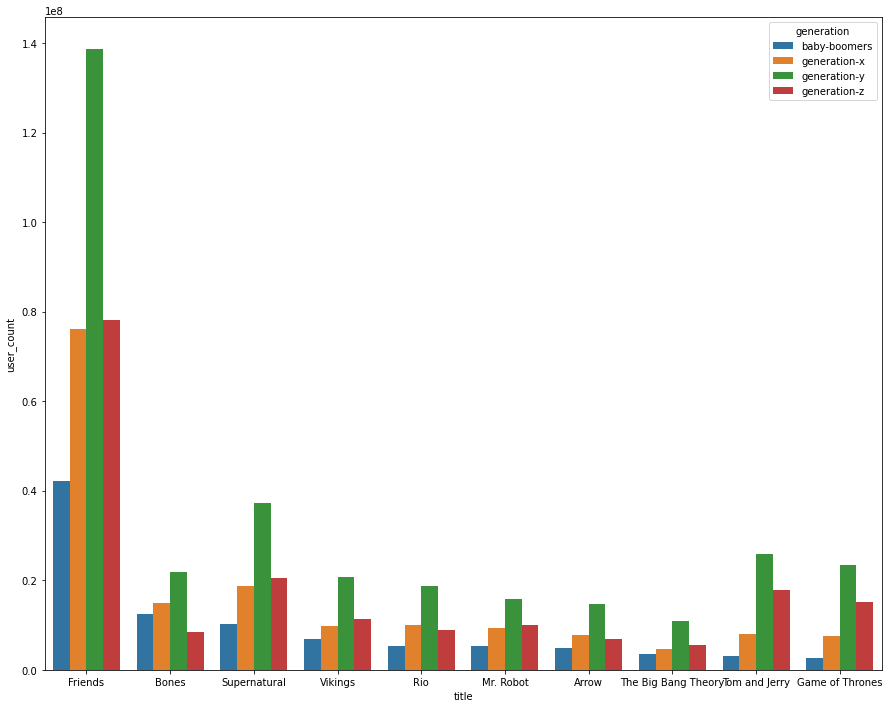

In [ ]:
plt.figure(figsize = (15, 12))
# 세대별로 비교
sns.barplot(x = 'title', y = 'user_count', data = top_10_df, hue = 'generation')
plt.show()

## 현재 전체적 비중은 y세대가 가장 높으며, OTT산업의 주요 공략 대상이다.상위 10개의 작품 중 영화는 1편이며, TV Show (Drama)가 인기가 많다.

## z세대 또한 y세대에 비해 상대적으로 적은 비중이지만, OTT서비스나, 최신 트렌드, IT에 접근성이 높은 ‘디지털 네이티브 세대’로 공략을 소홀히해서는 안되는 세대이다.


- 세대별 순서 baby-boomer > X > Y > Z

## 세대별 인기장르 비교
- 세대별, 장르별 장르 count

In [ ]:
# 장르 확인
df_all_gen['genre'].unique()

array(['Comedy', 'Crime', 'Fantasy', 'History', 'Science Fiction',
       'Animated', 'Superhero', 'Drama', 'Animation', 'Action',
       'Documentary', 'Horror', 'Romance', 'Biopic', 'Mystery', 'War',
       'Cry movie', '11/06/', 'For babies', 'Space opera', 'Adventure',
       'Thriller', 'United States', 'Western', '03/19/', '05/28/',
       'Music'], dtype=object)

## 잘못 크롤링 된 장르 확인

In [ ]:
df_all_gen.loc[df_all_gen['genre'] == '11/06/']

,rank,user_count,title,genre,generation
192,193,"83,000",Hell on Wheels,11/06/,baby-boomers
706,247,"60,000",Hell on Wheels,11/06/,generation-x
1223,304,"64,500",Hell on Wheels,11/06/,generation-y
1697,318,"42,500",Hell on Wheels,11/06/,generation-z


In [ ]:
df_all_gen.loc[df_all_gen['genre'] == '03/19/']

,rank,user_count,title,genre,generation
412,413,"21,100",Wilfred,03/19/,baby-boomers
720,261,"51,600",Wilfred,03/19/,generation-x
1156,237,"125,200",Wilfred,03/19/,generation-y
1786,407,"27,400",Wilfred,03/19/,generation-z


In [ ]:
df_all_gen.loc[df_all_gen['genre'] == '05/28/']

,rank,user_count,title,genre,generation
430,431,"9,800",Aquarius,05/28/,baby-boomers
881,422,"20,600",Aquarius,05/28/,generation-x
1255,336,"46,700",Aquarius,05/28/,generation-y
1793,414,"20,700",Aquarius,05/28/,generation-z


In [ ]:
df_all_gen.loc[df_all_gen['genre'] == 'United States']

,rank,user_count,title,genre,generation
264,265,"35,700",Mary Poppins,United States,baby-boomers
738,279,"42,100",Mary Poppins,United States,generation-x
1231,312,"60,500",Mary Poppins,United States,generation-y
1707,328,"39,200",Mary Poppins,United States,generation-z


위 네 가지 작품은 장르가 아예 없어 크롤링 시 숫자로 저장되었음. 하여 None으로 변경해줄 예정

In [ ]:
df_all_gen.loc[df_all_gen['genre'].isin(['11/06/', '03/19/', '05/28/', 'United States']), 'genre'] = 'None'

In [ ]:
df_all_gen.loc[df_all_gen['genre'] == 'None']

,rank,user_count,title,genre,generation
192,193,"83,000",Hell on Wheels,None,baby-boomers
264,265,"35,700",Mary Poppins,None,baby-boomers
412,413,"21,100",Wilfred,None,baby-boomers
430,431,"9,800",Aquarius,None,baby-boomers
706,247,"60,000",Hell on Wheels,None,generation-x
720,261,"51,600",Wilfred,None,generation-x
738,279,"42,100",Mary Poppins,None,generation-x
881,422,"20,600",Aquarius,None,generation-x
1156,237,"125,200",Wilfred,None,generation-y
1223,304,"64,500",Hell on Wheels,None,generation-y


In [ ]:
# Animated 와 Animation 통일
df_all_gen.loc[df_all_gen['genre'] == 'Animated', 'genre'] = 'Animation'

In [ ]:
df_all_gen['genre'].unique()

array(['Comedy', 'Crime', 'Fantasy', 'History', 'Science Fiction',
       'Animation', 'Superhero', 'Drama', 'Action', 'Documentary',
       'Horror', 'Romance', 'Biopic', 'Mystery', 'War', 'Cry movie',
       'None', 'For babies', 'Space opera', 'Adventure', 'Thriller',
       'Western', 'Music'], dtype=object)

# 시각화

In [ ]:
# 세대별 Top 100 병합
# 세대별로 순위 정보에 등록된 프로그램이 거의 같기 때문에 
# 전체 데이터프레임을 사용하면 시각화 결과가 뚜렷하지 못하여 세대별 Top100 사용
df_all_gen_100 = pd.concat([df_gen_b[:100], df_gen_x[:100], df_gen_y[:100], df_gen_z[:100]])

In [ ]:
# 장르 확인
df_all_gen_100['genre'].unique()

array(['Comedy', 'Crime', 'Fantasy', 'History', 'Science Fiction',
       'Animated', 'Superhero', 'Drama', 'Animation', 'Action',
       'Documentary', 'Horror', 'Romance', 'Biopic', 'Mystery', 'War',
       'Cry movie'], dtype=object)

In [ ]:
df_all_gen_100.loc[df_all_gen_100['genre'] == 'Animated', 'genre'] = 'Animation'

In [ ]:
df_all_gen_100['genre'].unique()

array(['Comedy', 'Crime', 'Fantasy', 'History', 'Science Fiction',
       'Animation', 'Superhero', 'Drama', 'Action', 'Documentary',
       'Horror', 'Romance', 'Biopic', 'Mystery', 'War', 'Cry movie'],
      dtype=object)

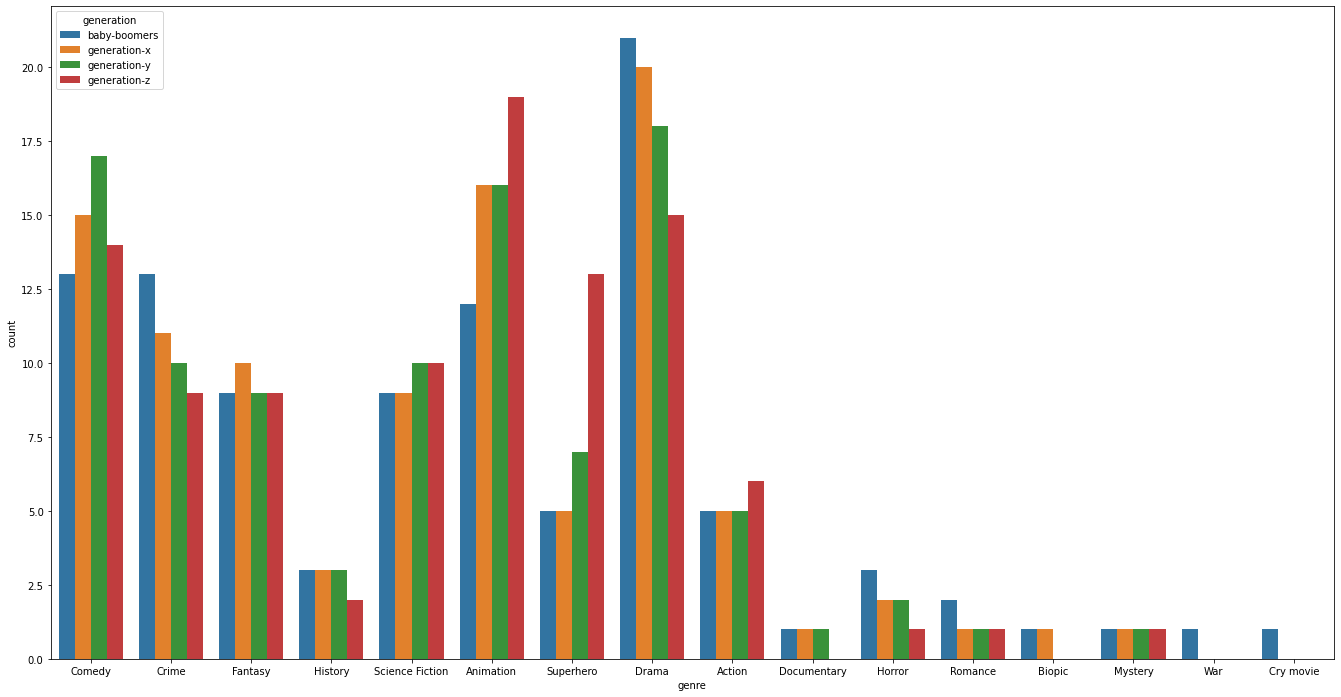

In [ ]:
plt.figure(figsize = (23, 12))
sns.countplot(x = df_all_gen_100['genre'], data = df_all_gen_100, hue = 'generation')

## 세대별 인기 장르

baby-boomers (1955~1963)
: Drama > Crime > Comedy 

generation-x (1964~1979)
: Drama > Animation > Comedy

generation-y (1980~1994)
: Drama > Comedy > Animation

generation-z(1995~2005)
: Animation > Drama > Comedy

In [ ]:
df_all_gen_100.groupby('generation')['genre']

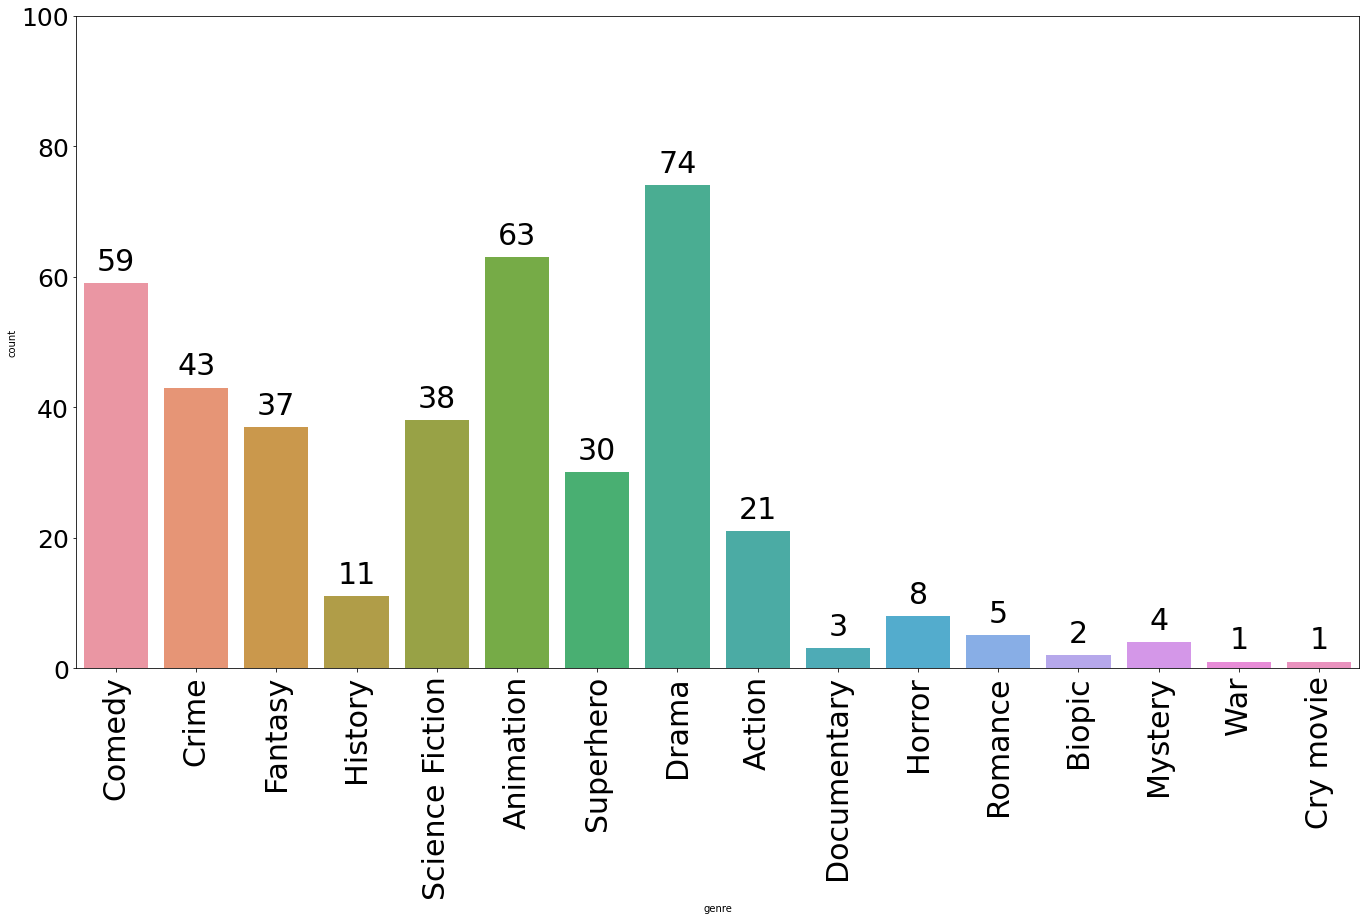

In [ ]:
plt.figure(figsize = (23, 12))
genre = sns.countplot(x = df_all_gen_100['genre'], data = df_all_gen_100)
# genre.patches : 각 하나하나 할당된 genre bar(16개)
for bar in genre.patches:
    height = bar.get_height() # 각 genre bar의 y값
    # (bar.get_x() + bar.get_width() / 2.)는 글자를 중앙에 적기 위한 위치 설정
    # (height + 2)는 그래프에 text가 너무 딱 달라붙는 것을 방지 (임의의 숫자 더해주기)
    # heigth는 text 값 (내용)
    # ha = 'center' 는 중앙에 정렬, right와 left도 적용됨
    # size는 글씨 사이즈 설정
    genre.text((bar.get_x() + bar.get_width() / 2.), (height + 2), (height), ha = 'center', size = 30)
    genre.set_ylim(0, 100) # y축 min = 0, max = 100
plt.xticks(size = 30, rotation = 90) # x축 사이즈와 기울기 설정
plt.yticks(size = 25) # y축 사이즈 설정
plt.show()

Drama(74) > Animation(63) > Comedy(59)

- Drama
Drama는 전 세대를 통틀어 인기가 많은 장르였다.
세대별로 보거나 전체 수치로 보아도 압도적인 상위권을 차지하였다.
→ 주기적인 모니터링을 통해 타 플랫폼보다 빠르게 Drama 장르를 수입/제작하는 것이 필수적으로 요구된다.
- Animation
육아와 연관이 없는 baby-boomers를 제외한 부모세대 (generation-x, generation-y)와 개방적인 젊은 세대 (generation-z)는 Animation 비중이 높았다.
→ 만화에 개방적인 젊은 세대에 매니아계층이 점점 늘어나는 추세를 보인다.
y세대에 이어 두번 째로 비중이 높은 z세대인 만큼 그들의 Needs를 충족할 필요가 있다.
- Comedy
최근에는 기존의 코미디 장르에서 벗어나 액션,드라마,사극 등과 같은 여러 장르와 융합한 하이브리드 코미디 콘텐츠가 큰 인기를 얻고 있는 추세를 보인다.
→ 타 플랫폼과는 다른 차별적으로 독자적인 코미디 장르를 제작하는 것이 경쟁력 강화에 도움이 될 것이다.

#최종 결론

##지속적인 Client의 Needs를 모니터링하여 파악하고 소통해야 기존의 Client 및 새로운 Client를 유입/유치하고 매출에 큰 영향력을 가져올 것이다.

# 파이차트 시각화

In [ ]:
# 파이차트에 라벨로 사용할 장르 목록
labels = list(df_all_gen_100['genre'].unique())
labels

['Comedy',
 'Crime',
 'Fantasy',
 'History',
 'Science Fiction',
 'Animation',
 'Superhero',
 'Drama',
 'Action',
 'Documentary',
 'Horror',
 'Romance',
 'Biopic',
 'Mystery',
 'War',
 'Cry movie']

In [ ]:
# baby-bommers generation 장르 별 작품 수
b_gen_100 = df_all_gen_100[:100].groupby('genre')[['title']].count().sort_values(by = 'title')
b_gen_100

,title
genre,
Biopic,1
Cry movie,1
Documentary,1
Mystery,1
War,1
Romance,2
History,3
Horror,3
Action,5


In [ ]:
# generation-x generation 장르 별 작품 수
x_gen_100 = df_all_gen_100[100:200].groupby('genre')[['title']].count().sort_values(by = 'title')
x_gen_100

,title
genre,
Biopic,1
Documentary,1
Mystery,1
Romance,1
Horror,2
History,3
Action,5
Superhero,5
Science Fiction,9


In [ ]:
# generation-y generation 장르 별 작품 수
y_gen_100 = df_all_gen_100[200:300].groupby('genre')[['title']].count().sort_values(by = 'title')
y_gen_100

,title
genre,
Documentary,1
Mystery,1
Romance,1
Horror,2
History,3
Action,5
Superhero,7
Fantasy,9
Crime,10


In [ ]:
# generation-z generation 장르 별 작품 수
z_gen_100 = df_all_gen_100[300:400].groupby('genre')[['title']].count().sort_values(by = 'title')
z_gen_100

,title
genre,
Horror,1
Mystery,1
Romance,1
History,2
Action,6
Crime,9
Fantasy,9
Science Fiction,10
Superhero,13


## 비중이 너무 작은 작품 (==1) 삭제

In [ ]:
b_gen_100 = b_gen_100[5:]
b_gen_100

,title
genre,
Romance,2
History,3
Horror,3
Action,5
Superhero,5
Fantasy,9
Science Fiction,9
Animation,12
Comedy,13


In [ ]:
x_gen_100 = x_gen_100[4:]
x_gen_100

,title
genre,
Horror,2
History,3
Action,5
Superhero,5
Science Fiction,9
Fantasy,10
Crime,11
Comedy,15
Animation,16


In [ ]:
y_gen_100 = y_gen_100[3:]
y_gen_100

,title
genre,
Horror,2
History,3
Action,5
Superhero,7
Fantasy,9
Crime,10
Science Fiction,10
Animation,16
Comedy,17


In [ ]:
z_gen_100 = z_gen_100[3:]
z_gen_100

,title
genre,
History,2
Action,6
Crime,9
Fantasy,9
Science Fiction,10
Superhero,13
Comedy,14
Drama,15
Animation,19


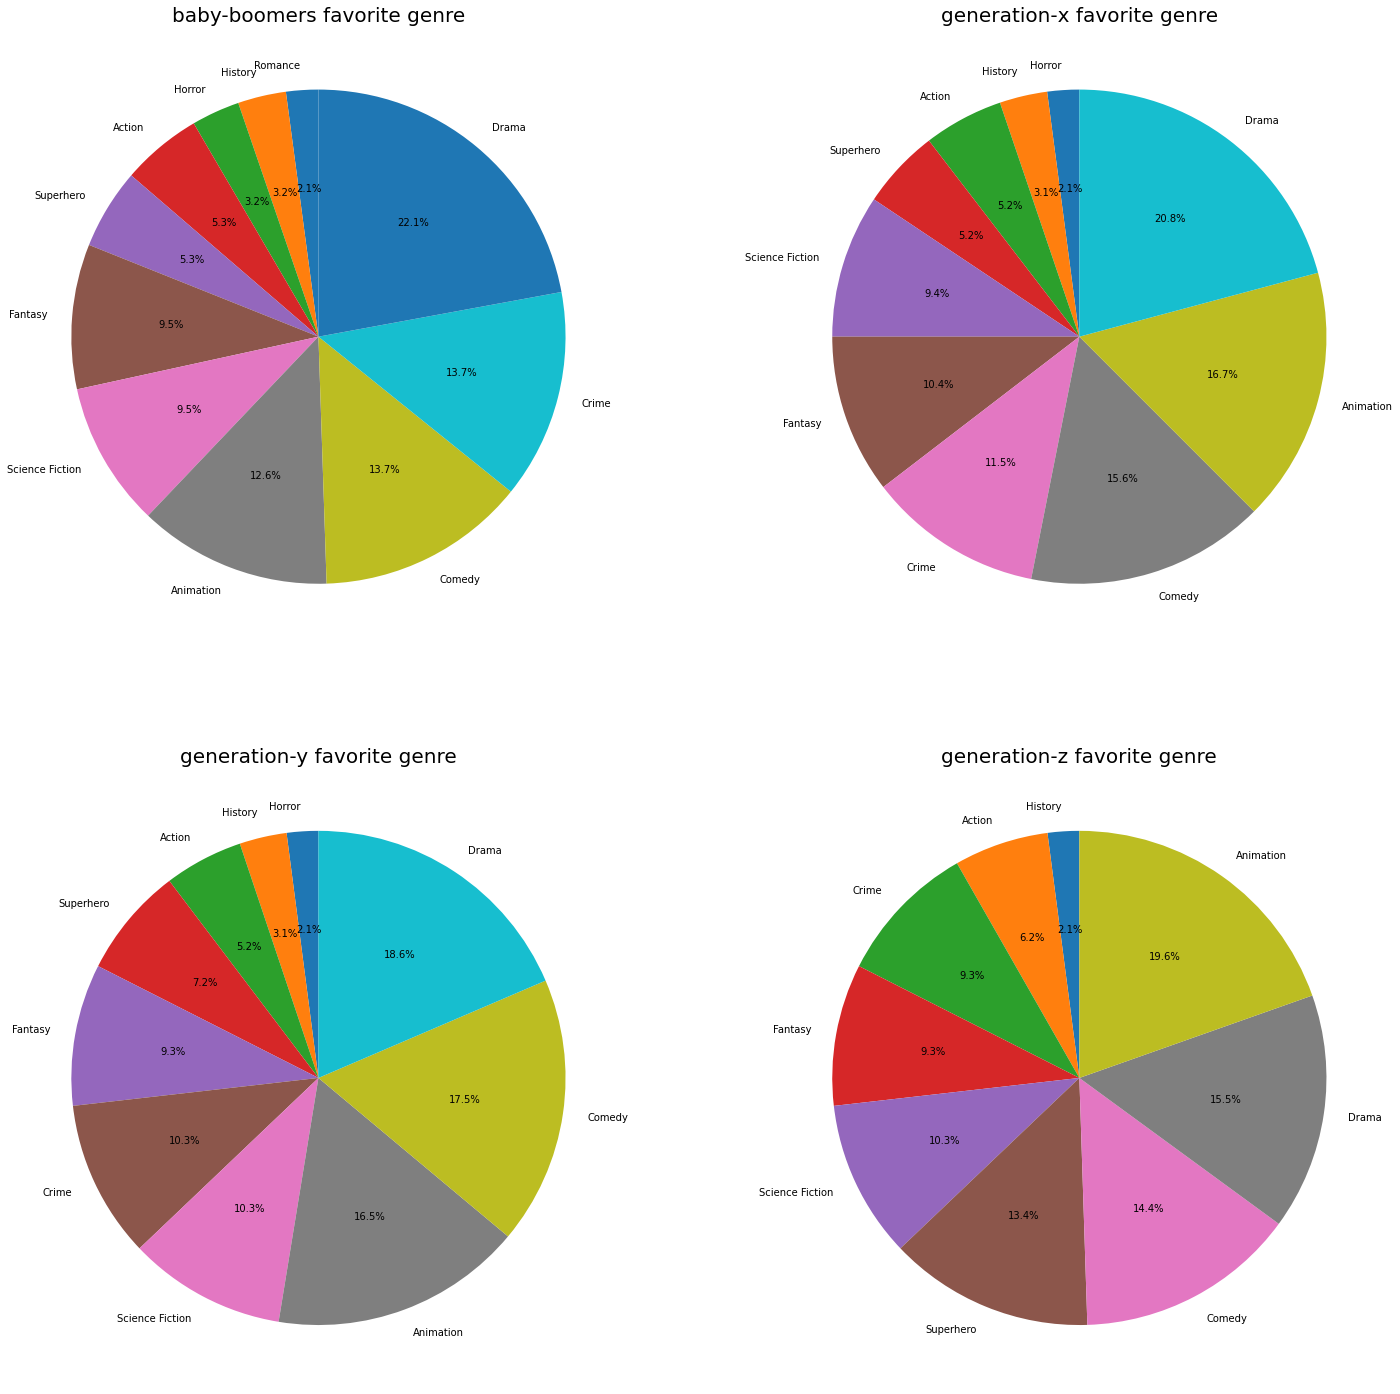

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(25,25))
axes[0, 0].pie(
    b_gen_100['title'], # count
    labels = b_gen_100.index, # 장르
    autopct = "%.1f%%", # 소수점 1자리까지 표시
    startangle = 90 # 12시 정각 위치에서 그래프가 시작, 0이면 3시에서 시작
)
axes[0, 0].set_title("baby-boomers favorite genre", fontsize=20) # 세대별 네이밍



axes[0, 1].pie(
    x_gen_100['title'],
    labels = x_gen_100.index,
    autopct = "%.1f%%", 
    startangle = 90
)
axes[0, 1].set_title("generation-x favorite genre", fontsize=20)



axes[1, 0].pie(
    y_gen_100['title'],
    labels = y_gen_100.index,
    autopct = "%.1f%%",
    startangle = 90
)
axes[1, 0].set_title("generation-y favorite genre", fontsize=20)



axes[1, 1].pie(
    z_gen_100['title'],
    labels = z_gen_100.index,
    autopct = "%.1f%%", 
    startangle = 90
)
axes[1, 1].set_title("generation-z favorite genre", fontsize=20)
plt.show()

# 세대별 인기 작품 타입 시각화

In [ ]:
df_gen_type['genre type'].value_counts()

Movie      1260
TV Show     580
Name: genre type, dtype: int64

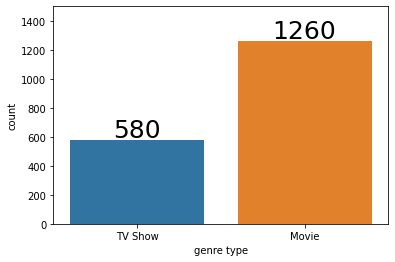

In [ ]:
types = sns.countplot(x = df_gen_type['genre type'], data = df_gen_type)
for bar in types.patches:
    height = bar.get_height() # 각 type bar의 y값
    # (bar.get_x() + bar.get_width() / 2.)는 글자를 중앙에 적기 위한 위치 설정
    # (height + 20)은 그래프에 text가 너무 딱 달라붙는 것을 방지 (임의의 숫자 더해주기)
    # heigth는 text 값 (내용)
    # ha = 'center' 는 중앙에 정렬, right와 left도 적용됨
    # size는 글씨 사이즈 설정
    types.text((bar.get_x() + bar.get_width() / 2.), (height + 20), (height), ha = 'center', size = 25)
    types.set_ylim(0, 1500) # y축 min = 0, max = 1500

전체적인 비중은 movie가 많으나 변별력이 없어 각 세대별 top 100의 장르 비중을 파악할 예정

In [ ]:
b_type = df_gen_type[df_gen_type['rank'] <= 100][:100]
b_type

,rank,genre type,generation
0,1,TV Show,baby-boomers
1,2,TV Show,baby-boomers
2,3,TV Show,baby-boomers
3,4,Movie,baby-boomers
4,5,TV Show,baby-boomers
...,...,...,...
95,96,TV Show,baby-boomers
96,97,Movie,baby-boomers
97,98,Movie,baby-boomers
98,99,Movie,baby-boomers


In [ ]:
x_type = df_gen_type[df_gen_type['rank'] <= 100][100:200]
x_type

,rank,genre type,generation
460,1,TV Show,generation-x
461,2,TV Show,generation-x
462,3,TV Show,generation-x
463,4,Movie,generation-x
464,5,TV Show,generation-x
...,...,...,...
555,96,Movie,generation-x
556,97,TV Show,generation-x
557,98,TV Show,generation-x
558,99,Movie,generation-x


In [ ]:
y_type = df_gen_type[df_gen_type['rank'] <= 100][200:300]
y_type

,rank,genre type,generation
920,1,TV Show,generation-y
921,2,TV Show,generation-y
922,3,TV Show,generation-y
923,4,TV Show,generation-y
924,5,TV Show,generation-y
...,...,...,...
1015,96,Movie,generation-y
1016,97,Movie,generation-y
1017,98,TV Show,generation-y
1018,99,TV Show,generation-y


In [ ]:
z_type = df_gen_type[df_gen_type['rank'] <= 100][300:]
z_type

,rank,genre type,generation
1380,1,TV Show,generation-z
1381,2,TV Show,generation-z
1382,3,TV Show,generation-z
1383,4,TV Show,generation-z
1384,5,TV Show,generation-z
...,...,...,...
1475,96,Movie,generation-z
1476,97,TV Show,generation-z
1477,98,TV Show,generation-z
1478,99,Movie,generation-z


In [ ]:
top100_type = df_gen_type[df_gen_type['rank'] <= 100]
top100_type

,rank,genre type,generation
0,1,TV Show,baby-boomers
1,2,TV Show,baby-boomers
2,3,TV Show,baby-boomers
3,4,Movie,baby-boomers
4,5,TV Show,baby-boomers
...,...,...,...
1475,96,Movie,generation-z
1476,97,TV Show,generation-z
1477,98,TV Show,generation-z
1478,99,Movie,generation-z


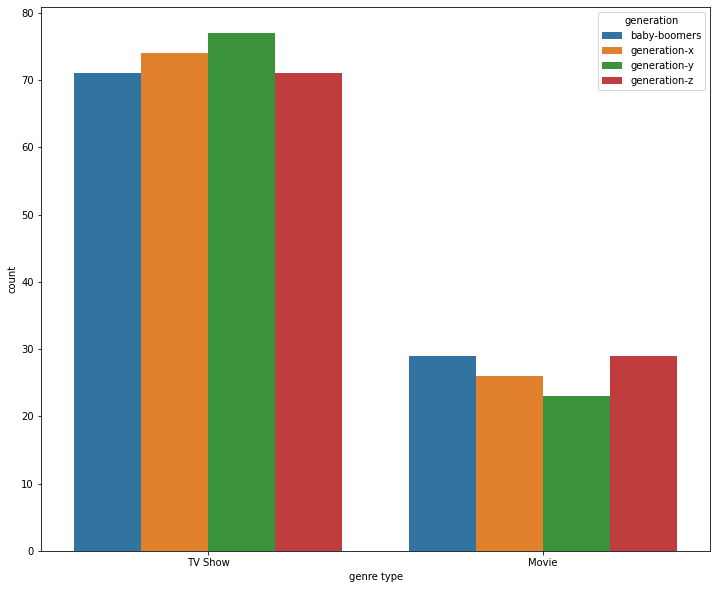

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'genre type', data = top100_type, hue = 'generation')

## 전체 타입의 비중을 확인하면 영화가 많지만 세대별로 인기있는 Top 100의 비중은 TV Show (Drama Series)가 많은 것을 알 수 있다. 회사 입장에서는 Drama 수입/제작에 신경쓸 필요가 있다.

## 상대적으로 CG나 연출이 많이 필요한 SF, SuperHero같은 장르가 아닌 일반적으로 쉽게 부담없이 보기좋은 Drama 장르와 현재 트렌드인 TV show 타입의 작품을 수입/제작하는 것이 좋을 것이다.

##인기 작품의 타입이 TV Show인 이유는 러닝타임이 상대적으로 긴 시간을 차지하는 영화보다 짧게 짧게 시청할 수 있는 것으로 추측된다.
